In [212]:
!pip install beautifulsoup4

In [213]:
!pip install requests


In [214]:
import requests
from bs4 import BeautifulSoup



In [215]:
!pip install textblob

In [216]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob

In [256]:
url='https://www.consumeraffairs.com/delivery/fedex-shipping.html?page=2'

In [257]:
review=[]
page=requests.get(url)
soup=BeautifulSoup(page.content,'html.parser')
bunch = soup.findAll('div',attrs={"class":"rvw-bd"})
for x in bunch:
        review.append((x.find('p').text))

In [220]:
review=[]
check=[]
for i in range(1,155):
    url='https://www.consumeraffairs.com/delivery/fedex-shipping.html?page='
    url=url+str(i)
    check.append(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    bunch = soup.findAll('div',attrs={"class":"rvw-bd"})
    for x in bunch:
        review.append((x.find('p').text))
    

In [221]:
check[1:5]

['https://www.consumeraffairs.com/delivery/fedex-shipping.html?page=2',
 'https://www.consumeraffairs.com/delivery/fedex-shipping.html?page=3',
 'https://www.consumeraffairs.com/delivery/fedex-shipping.html?page=4',
 'https://www.consumeraffairs.com/delivery/fedex-shipping.html?page=5']

In [258]:
len(review)

10

In [259]:
sample=review[1:10]

In [223]:

from string import punctuation
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words=stopwords.words('English')
type(stop_words)

punct=list(punctuation)
type(punct)

remove_words=stop_words+punct

type(remove_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


list

In [276]:
from textblob import Word
from nltk.stem import LancasterStemmer 
ps=LancasterStemmer()

def preprocessing(review):
    lower=review.lower() #converting to lower case
    blob=TextBlob(lower)
    tokenized=blob.words # tokenize to words
    clean_words=[i for i in tokenized if i not in remove_words] # remove stopwords
    remove_digits = [i for i in clean_words if not i.isdigit()] # remove numbers
    lemmatize= [Word(i).lemmatize() for i in remove_digits]
    #stemming=[ps.stem(i) for i in lemmatize]
    binding= " ".join(lemmatize)
    return binding

In [277]:
def adjectives(text):
    t=''
    blob=TextBlob(text)
    for words,pos in blob.tags:
        if(pos=='JJ'or pos=='JJR' or pos=='JJS'):
            t=t+' '+words
    return t

In [278]:
df3=[]
for i in range(len(sample)):
    z=preprocessing(sample[i])
    a=adjectives(z)
    df3.append(z)

In [279]:
new_df=pd.DataFrame(df3)
new_df.columns=['review']

In [280]:
new_df.head()

,review
0,multiple horrible experience call track packag...
1,supposed receive medicine last wednesday today...
2,absolutely worst carrier delivery service trou...
3,absolutely horrific service second time day de...
4,building n't allow delivery left lobby must ta...


In [229]:

!pip install wordcloud

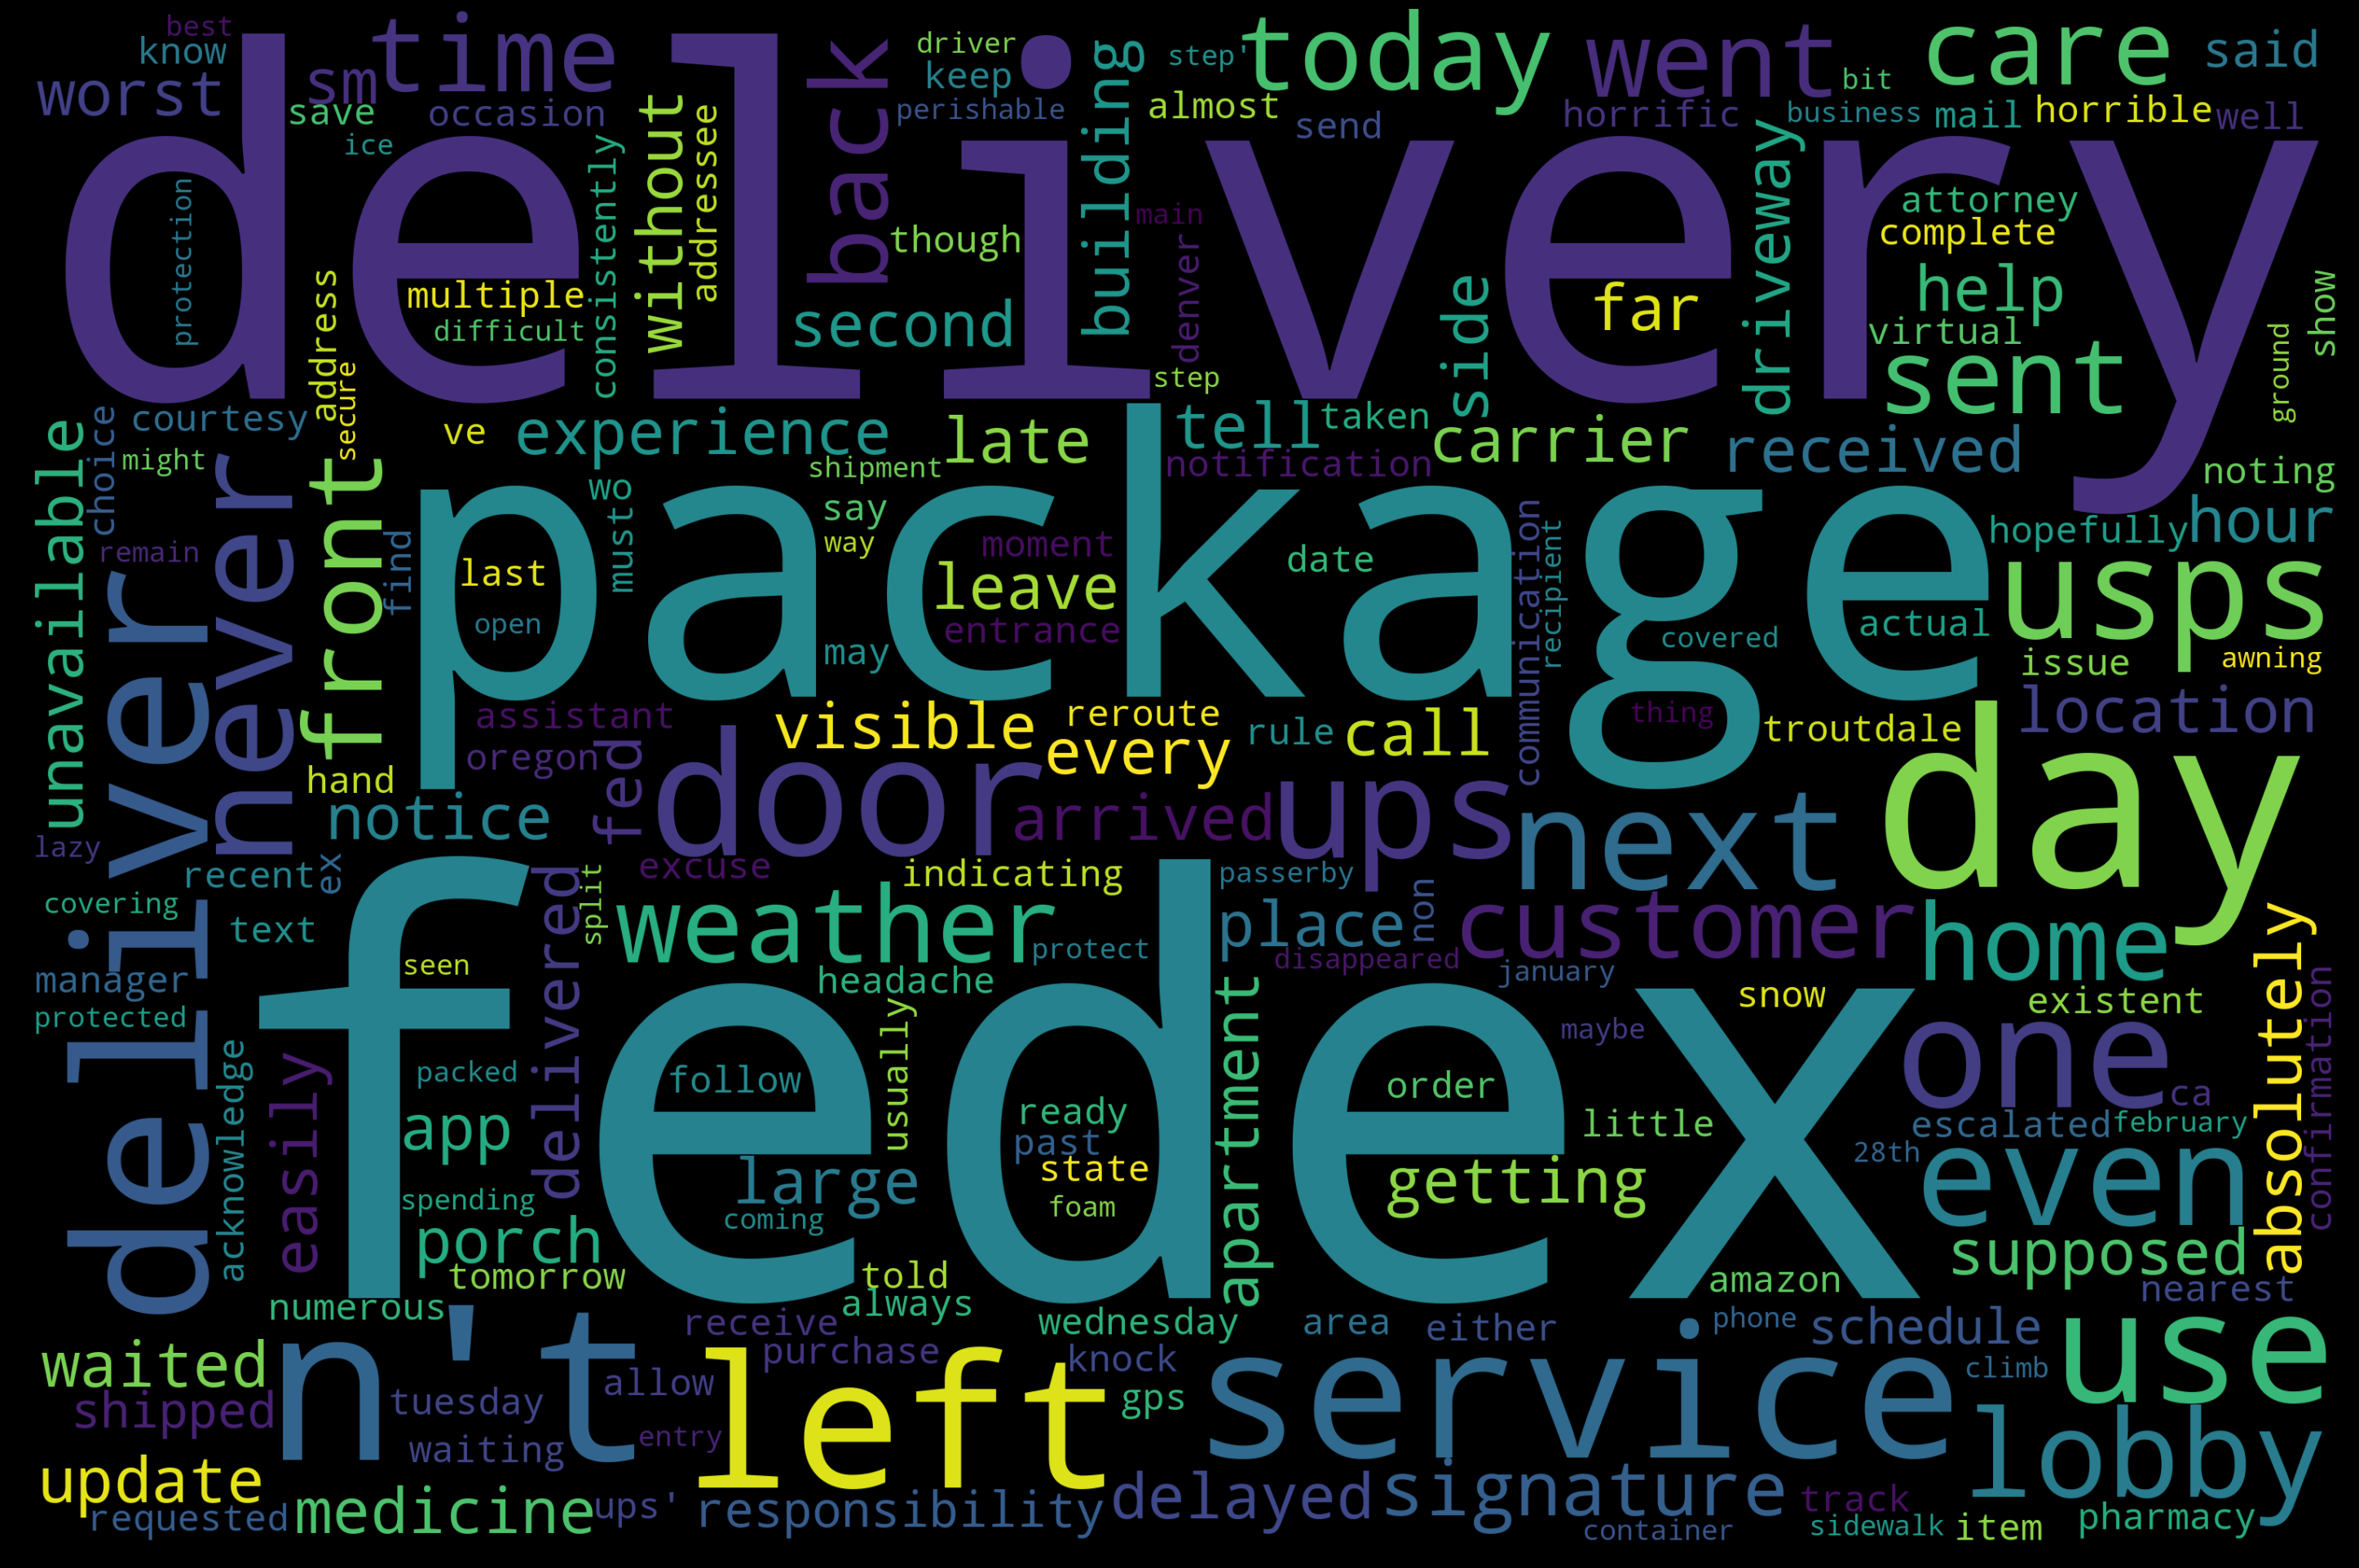

In [281]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = new_df.review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()